In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# import numpy as np
# from scipy.stats import zscore

file = '../data/01_raw/top_500.csv'

try:
     data = pd.read_csv(file)
     print(f"Plik '{file}' został poprawnie wczytany.")
except Exception as e:
     print(f"Błąd podczas wczytywania pliku: {e}")
     data = pd.DataFrame()

In [ ]:
# Podstawowe informacje o danych
info = pd.DataFrame({
    'Typ kolumny': data.dtypes,
    'Brakujące wartości': data.isnull().sum(),
    'Unikalne wartości': data.nunique()
})

print(f"Rozmiar danych: {data.shape[0]} wierszy × {data.shape[1]} kolumn\n")
display(info)

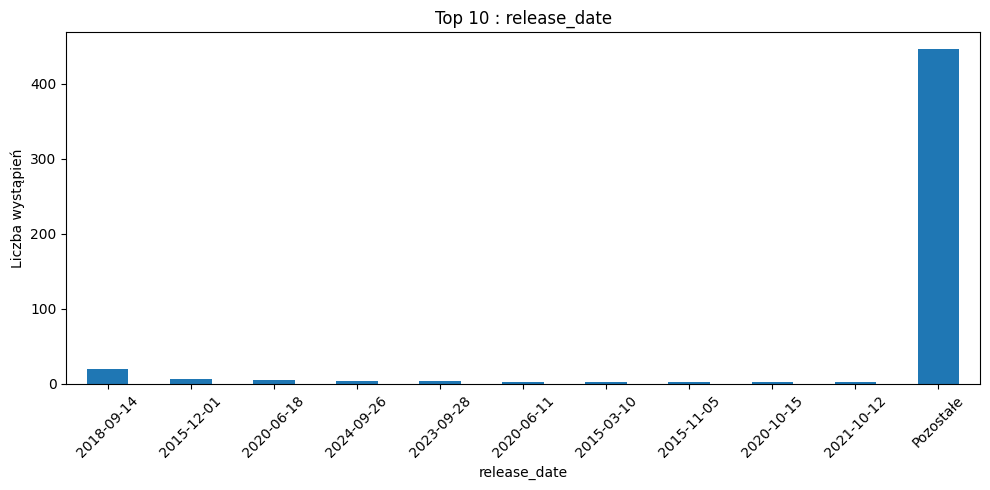

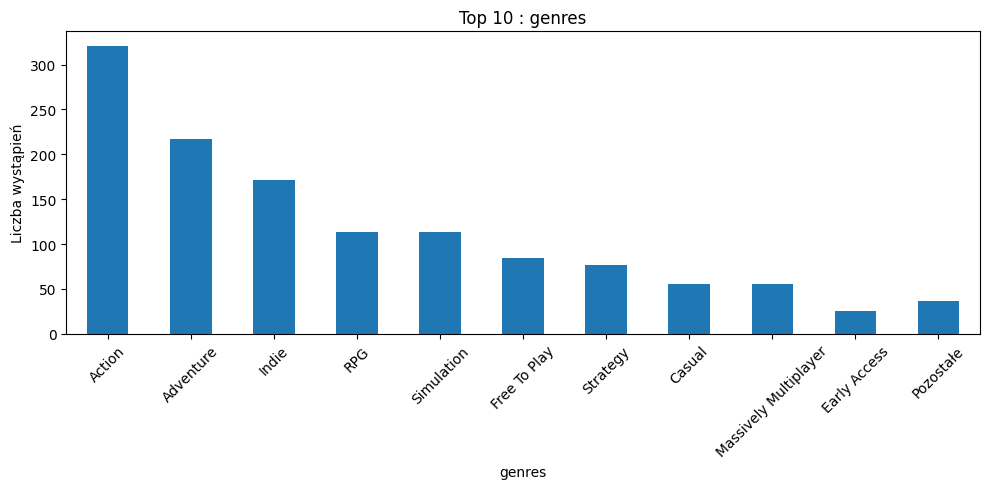

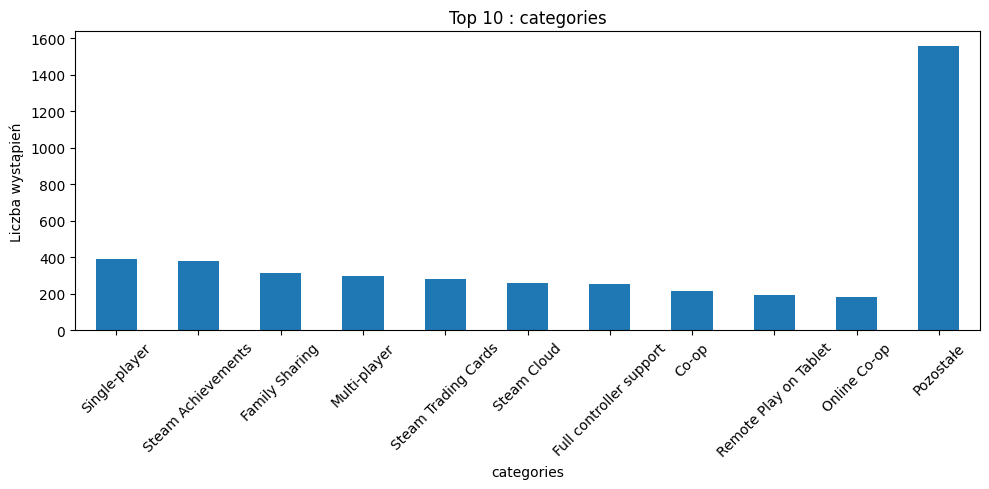

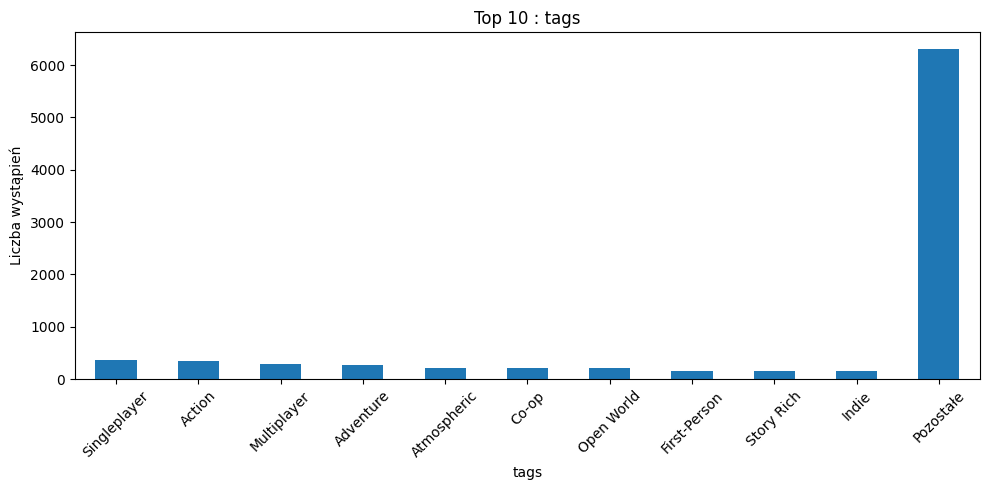

In [14]:
# Rozkład cech kategorycznych 

# kolumny kategoryczne sensowne do analizy 
cat_cols = [  'release_date', 'genres', 'categories', 'tags']

for col in cat_cols:
    if col not in data.columns:
        continue  # pomijam kolumny, których nie ma w danych

    # kolumny typu lista do rozbicia i zliczenia
    # niektore kolumny mają zapis w typie string z listą, np. "['Action', 'Adventure']" przez to że gra mieści się np w wielu genrach
    if col in ['genres', 'categories', 'tags', 'platforms', 'steamspy_tags']:
        exploded = data[col].dropna().apply(lambda x: eval(x) if isinstance(x, str) else x).explode()
        counts = exploded.value_counts()
    else:
        # zwykłe kolumny w typie stringa
        counts = data[col].value_counts()

# kategorie zliczane które warto przedstawić w zestawieniu Najczęściej występujących
    if len(counts) > 10:
        top_counts = counts[:10]
        top_counts['Pozostałe'] = counts[10:].sum()
        plot_data = top_counts
        title = f"Top 10 : {col}"
    else:
        plot_data = counts
        title = f"Rozkład kategorii dla {col}"

    plt.figure(figsize=(10, 5))
    plot_data.plot(kind='bar')
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Liczba wystąpień')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()